In [101]:
!gdown --id 1xWkZ70Fc0y0WvzI-4Iw8fbPI9hP_biZT

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1xWkZ70Fc0y0WvzI-4Iw8fbPI9hP_biZT
From (redirected): https://drive.google.com/uc?id=1xWkZ70Fc0y0WvzI-4Iw8fbPI9hP_biZT&confirm=t&uuid=ab262df9-607f-4b5d-a85b-c34febe8c938
To: /content/tops_fashion.json
100% 263M/263M [00:03<00:00, 68.0MB/s]


In [102]:
from zipfile import ZipFile
import os
import pandas as pd
import numpy as np

In [103]:
data = pd.read_json('/content/tops_fashion.json')

In [104]:
data.head()

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183138 entries, 0 to 183137
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   sku                363 non-null     object
 1   asin               183138 non-null  object
 2   product_type_name  183138 non-null  object
 3   formatted_price    28395 non-null   object
 4   author             1 non-null       object
 5   color              64956 non-null   object
 6   brand              182987 non-null  object
 7   publisher          42899 non-null   object
 8   availability       24532 non-null   object
 9   reviews            183138 non-null  object
 10  large_image_url    183138 non-null  object
 11  availability_type  24559 non-null   object
 12  small_image_url    183138 non-null  object
 13  editorial_review   2758 non-null    object
 14  title              183138 non-null  object
 15  model              62370 non-null   object
 16  medium_image_url   1

In [106]:
print('Number of data points : ', data.shape[0])

Number of data points :  183138


In [107]:
print('Number of features/variables:', data.shape[1])

Number of features/variables: 19


Each product/item has 19 features in the raw dataset.

Of these 19 features, we will be using only 7 features in this notebook.

1.   asin ( Amazon standard identification number)
2.   brand ( brand to which the product belongs to )
3.   color ( Color information of apparel, it can contain many colors as a value ex: red and black stripes )
4.   product_type_name ( type of the apperal, ex: SHIRT/TSHIRT )
5.   medium_image_url ( url of the image )
6.   title ( title of the product. )
7.   formatted_price ( price of the product )

In [108]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [109]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


In [110]:
print("UPDATED SHAPE OF THE DATA : ", data.shape)

UPDATED SHAPE OF THE DATA :  (183138, 7)


#Basic *Statistics*

### product_type_name

In [111]:
print(data['product_type_name'].describe())

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


*   We have total 72 unique type of product_type_names
*   91.62% ( 167794/183138 ) of the products are shirts.

In [112]:
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [113]:
from collections import Counter

In [114]:
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

### brand

In [115]:
print(data['brand'].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object




*   There are 10577 unique brands
*   ( 183138 - 182987 ) 151 missing values.



In [116]:
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

###color

In [117]:
print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object




*   we have 7380 unique colors
*   7.2% of products are black in color
*   64956 of 183138 products have color information. That's approx 35.4%.




In [118]:
color_count = Counter(list(data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

### formatted_price

In [119]:
print(data['formatted_price'].describe())

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


Only 28,395 (15.5% of whole data) products with price information

In [120]:
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]



*   Only 15.5% of whole products with price information, others are 'None'



###title

In [121]:
print(data['title'].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object




By watching the 'count', we can say that 'title' feature is available for most items. This makes it most important feature too.

*   All of the products have a title.
*   Titles are fairly descriptive of what the product is.
*   We will use titles extensively in this project as they are short and informative.
*   By watching the 'count', we can say that 'title' feature is available for most items. This makes it most important feature too.



#NULL Dropping

In [122]:
data.isnull().sum()

,0
asin,0
brand,151
color,118182
medium_image_url,0
product_type_name,0
title,0
formatted_price,154743


In [123]:
data.to_pickle('/content/180k_apparel_data')

In [124]:
from sklearn.impute import KNNImputer

In [125]:
data = data.loc[~data['formatted_price'].isnull()]

In [126]:
print('Number of data points After eliminating price = NULL :', data.shape[0])

Number of data points After eliminating price = NULL : 28395


In [127]:
data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color = NULL :', data.shape[0])

Number of data points After eliminating color = NULL : 28385


In [128]:
data.shape

(28385, 7)

In [129]:
data.to_pickle('/content/28k_apparel_data')

In [131]:
print(sum(data.duplicated('title')))

2325


We have 2325 products which have same title but different color.

In [132]:
data = pd.read_pickle('/content/28k_apparel_data')
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50


In [133]:
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

After removal of products with short description: 27949


In [134]:
data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted.head()

<ipython-input-134-d25356f60799>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted.sort_values('title',inplace=True, ascending=False)


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


# Removing Most Similar Duplicates

In [135]:
indices = []
for i, row in data_sorted.iterrows():
    indices.append(i)

In [136]:
import itertools
duplicates = []
i=0
j=0

num_data_points = data_sorted.shape[0]


while(i<num_data_points and j<num_data_points):
  previous_i = i
  a = data['title'].loc[indices[i]].split()
  j = i+1

  while j < num_data_points:
      b = data['title'].loc[indices[j]].split()
      length = max(len(a), len(b))
      count  = 0

      for k in itertools.zip_longest(a, b):
          if (k[0] == k[1]):
              count += 1


      if (length - count) > 2:
          duplicates.append(data_sorted['asin'].loc[indices[i]])

          if(j == num_data_points-1):
            duplicates.append(data_sorted['asin'].loc[indices[j]])

          i = j
          break
      else:
          j += 1

  if previous_i == i:
      break

In [137]:
data = data.loc[data['asin'].isin(duplicates)]

In [138]:
data.to_pickle('/content/17k_apparel_data')

In [139]:
print('Number of data points at final stage:', data.shape[0])

Number of data points at final stage: 17593


#Text pre-processing

In [140]:
data = pd.read_pickle('/content/17k_apparel_data')
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,$13.53


In [141]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [143]:
stop_words = set(stopwords.words('english'))
print('list of stop words:', stop_words)

list of stop words: {'t', 'himself', 'yourself', "needn't", 'him', 'i', 'about', 'on', 'above', 'won', 'his', 'they', 'whom', "hasn't", 'by', 'further', 'haven', "it's", 'not', "wouldn't", "couldn't", 'those', 'most', 'over', 'hasn', 'herself', "aren't", 'why', 'mightn', "shouldn't", 'her', 'off', 'it', 'very', "weren't", 'into', 'any', 'shan', 'been', "wasn't", 'some', 'now', 'after', 'through', 'shouldn', 'does', 'against', 'once', 'itself', 'd', 'or', 'ma', 'own', 'were', 'because', 'few', 'needn', 'me', 'as', "hadn't", 'down', 'ours', 'will', 'being', 'but', 'before', 'under', "won't", 'between', 'doesn', 'your', "she's", 'where', 'the', 'during', 'theirs', "you'll", 'ourselves', 'should', 'weren', 'do', 'all', 'o', 'isn', "you'd", 'a', "don't", 'when', 'themselves', 'has', 'didn', 'what', "you've", 'here', 'both', 'couldn', 'is', "haven't", 'their', 'm', 'aren', 'such', 'from', "doesn't", 'did', 'until', 's', 'just', 'and', 'this', 'out', 'at', 'she', 'more', "mightn't", 'an', 'to

In [144]:
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            word = ("".join(e for e in words if e.isalnum()))
            word = word.lower()

            if not word in stop_words:
                string += word + " "

        data[column][index] = string

In [145]:
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

In [146]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,$13.53


#Stemming

In [147]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

#Important Utility Functions

In [148]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import seaborn as sns

In [149]:
def display_img(url, ax, fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)

#Plotting code

In [150]:

def plot_heatmap(keys, values, labels, url, text):

        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1])
        fig = plt.figure(figsize=(25,3))
        ax = plt.subplot(gs[0])
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys)
        ax.set_title(text)

        ax = plt.subplot(gs[1])

        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

        display_img(url, ax, fig)

        plt.show()

#Plot Heatmap with Apparel Image

In [151]:
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    intersection = set(vec1.keys()) & set(vec2.keys())
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    keys = list(vec2.keys())
    values = [vec2[x] for x in vec2.keys()]

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)

#Text to Vector

In [152]:
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words)

#Result Function

In [153]:
def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)
    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

#Bag Of Words based Product Similarity

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
bow_title_vectorizer = CountVectorizer()
bow_title_features = CountVectorizer().fit_transform(data['title'])
bow_title_features.get_shape()

(17593, 12927)

In [85]:
def bag_of_words_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(bow_title_features, bow_title_features[doc_id], metric='cosine', n_jobs=-1)
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    for i in range(0, len(indices)):
        get_result(indices[i], data['title'].loc[df_indices[0]],
                   data['title'].loc[df_indices[i]],
                   data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')

        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*80)

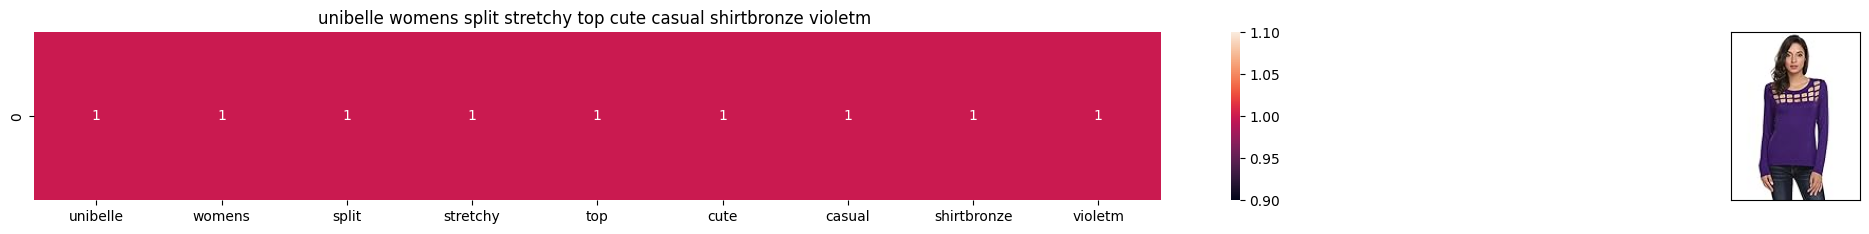

ASIN : B074PT5M59
Brand: Beautyuu
Title: unibelle womens split stretchy top cute casual shirtbronze violetm 
Euclidean similarity with the query image : 0.0


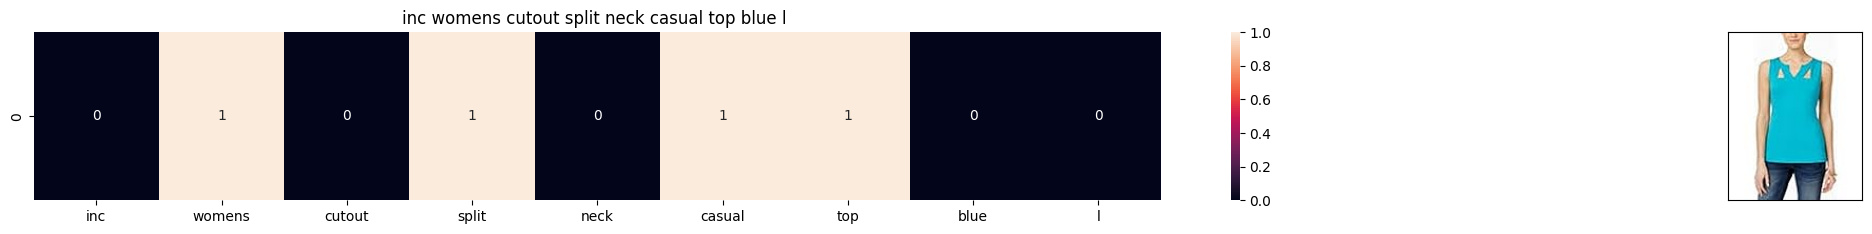

ASIN : B01NAST7MR
Brand: INC International Concepts
Title: inc womens cutout split neck casual top blue l 
Euclidean similarity with the query image : 0.5285954792089684


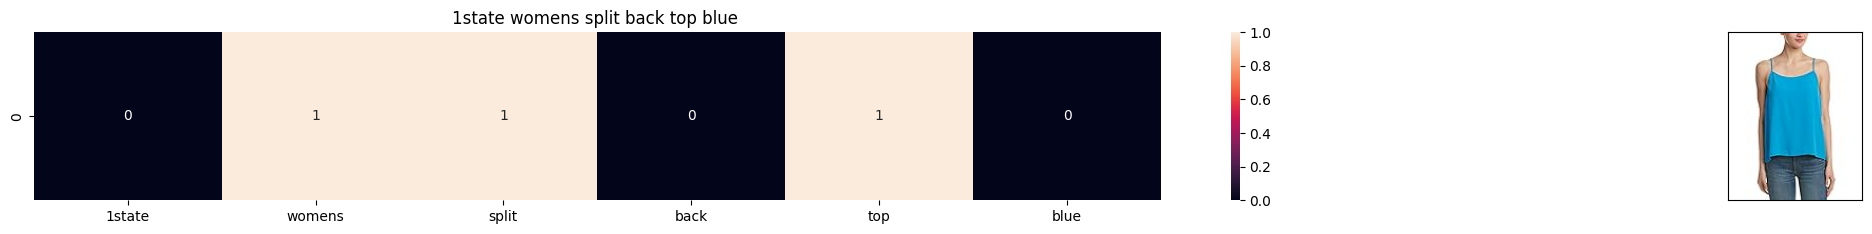

ASIN : B071DQ3VQH
Brand: 1.State
Title: 1state womens split back top blue 
Euclidean similarity with the query image : 0.591751709536137


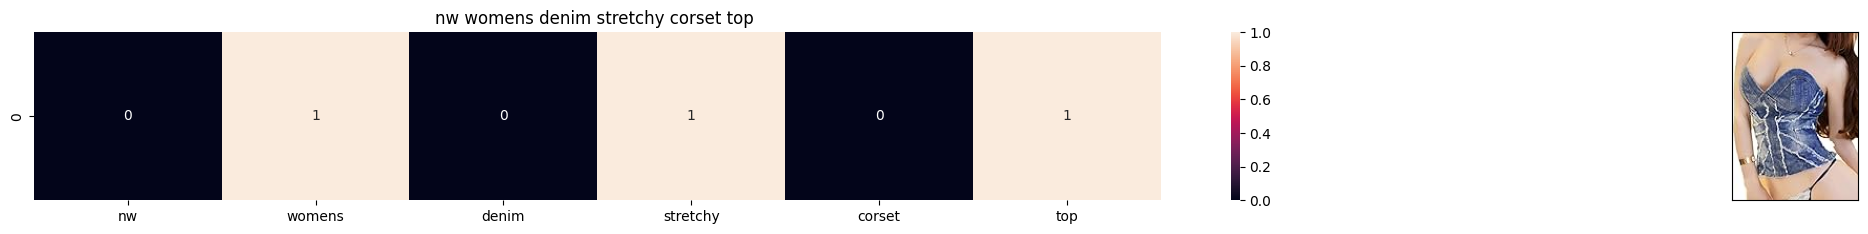

ASIN : B01G364ZHS
Brand: 60°N 95°W
Title: nw womens denim stretchy corset top 
Euclidean similarity with the query image : 0.591751709536137


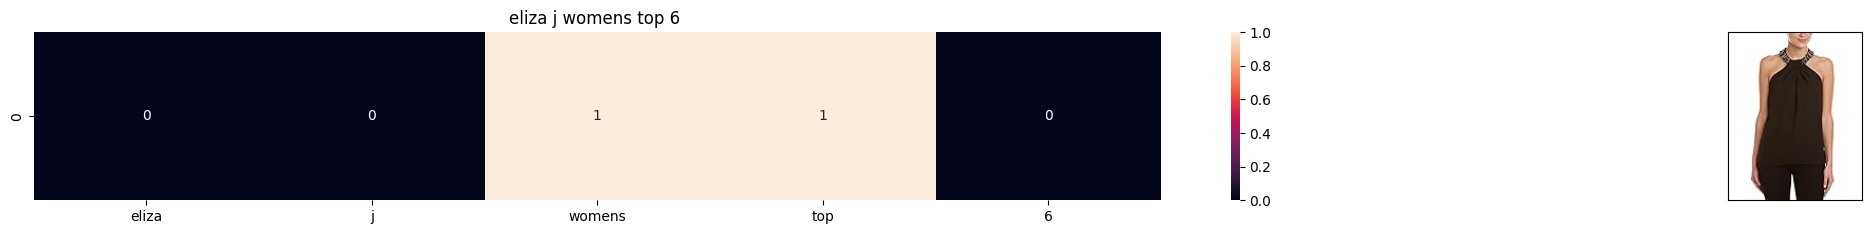

ASIN : B01M9FEO82
Brand: Eliza J
Title: eliza j womens top 6 
Euclidean similarity with the query image : 0.6150998205402495


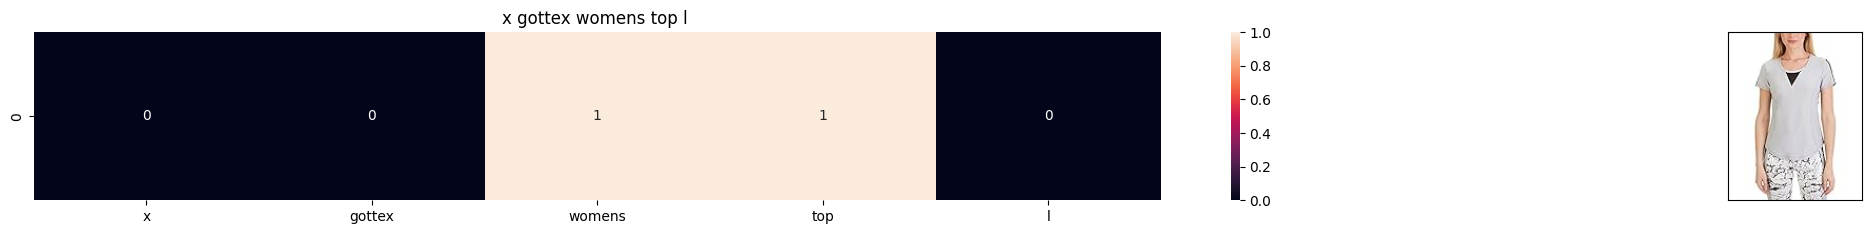

ASIN : B073M78XLP
Brand: X by Gottex
Title: x gottex womens top l 
Euclidean similarity with the query image : 0.6150998205402495


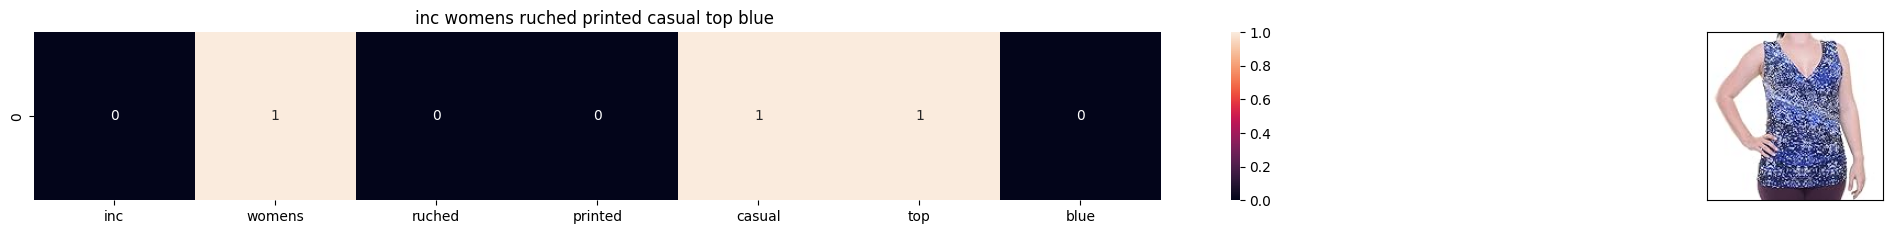

ASIN : B06W5QPHLP
Brand: INC International Concepts
Title: inc womens ruched printed casual top blue 
Euclidean similarity with the query image : 0.6220355269907728


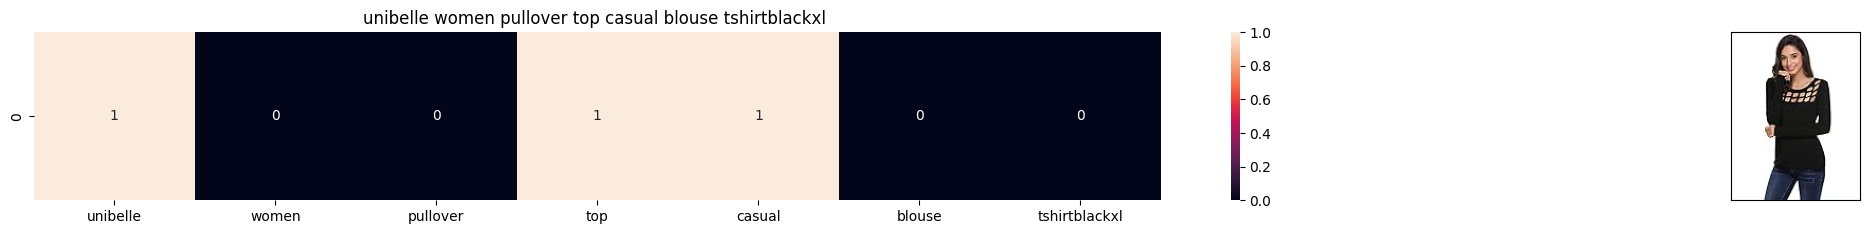

ASIN : B074PSVK8N
Brand: Beautyuu
Title: unibelle women pullover top casual blouse tshirtblackxl 
Euclidean similarity with the query image : 0.6220355269907728


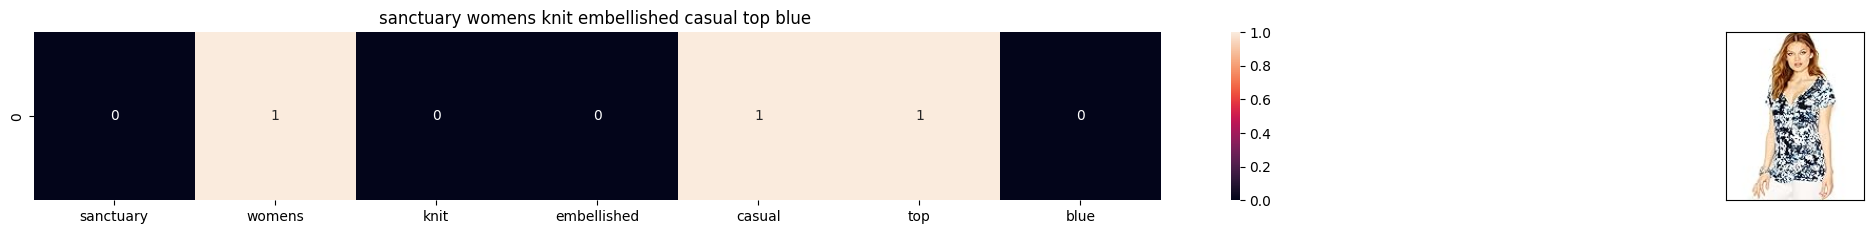

ASIN : B01DUPAOGG
Brand: Sanctuary Clothing
Title: sanctuary womens knit embellished casual top blue 
Euclidean similarity with the query image : 0.6220355269907728


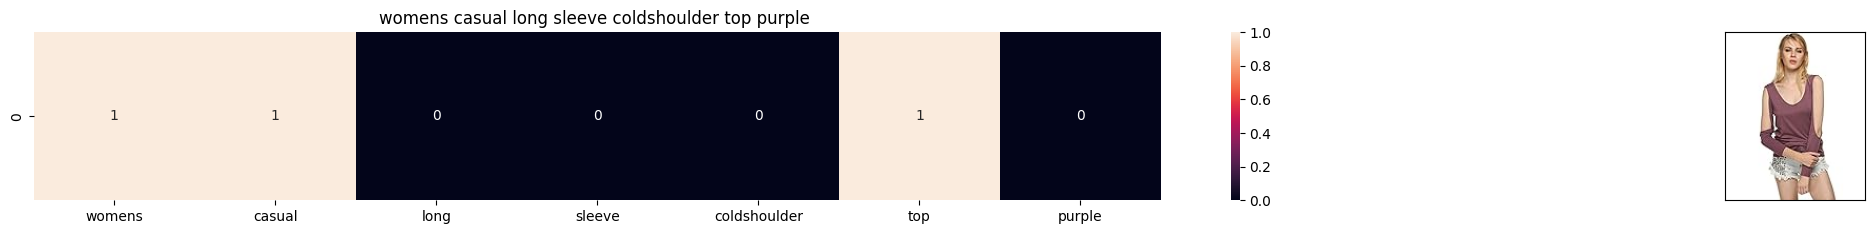

ASIN : B01I2WWAPU
Brand: Milkuu
Title: womens casual long sleeve coldshoulder top purple 
Euclidean similarity with the query image : 0.6220355269907728


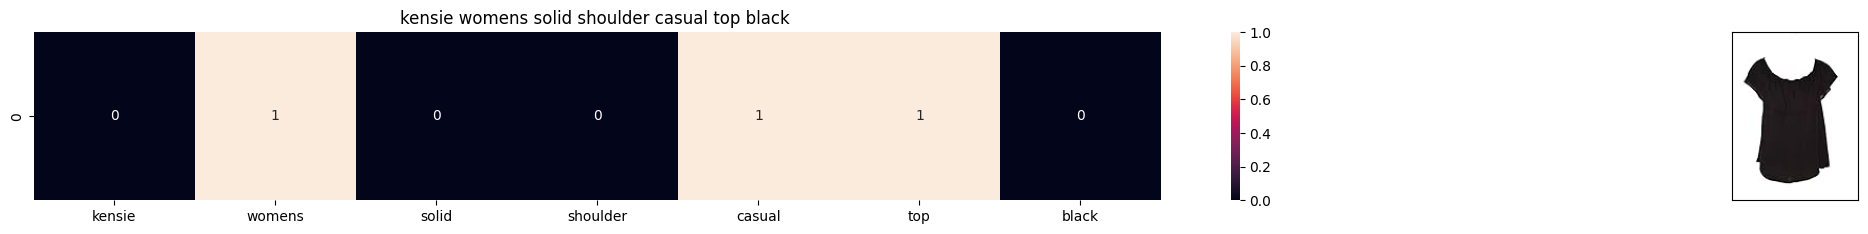

ASIN : B072HLFGT5
Brand: kensie
Title: kensie womens solid shoulder casual top black 
Euclidean similarity with the query image : 0.6220355269907728


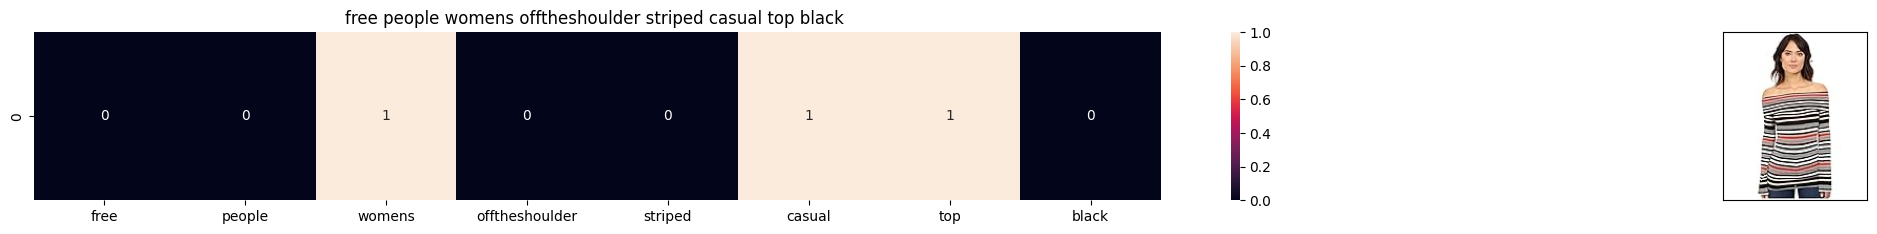

ASIN : B01HCZLYW8
Brand: Free People
Title: free people womens offtheshoulder striped casual top black 
Euclidean similarity with the query image : 0.6464466094067263


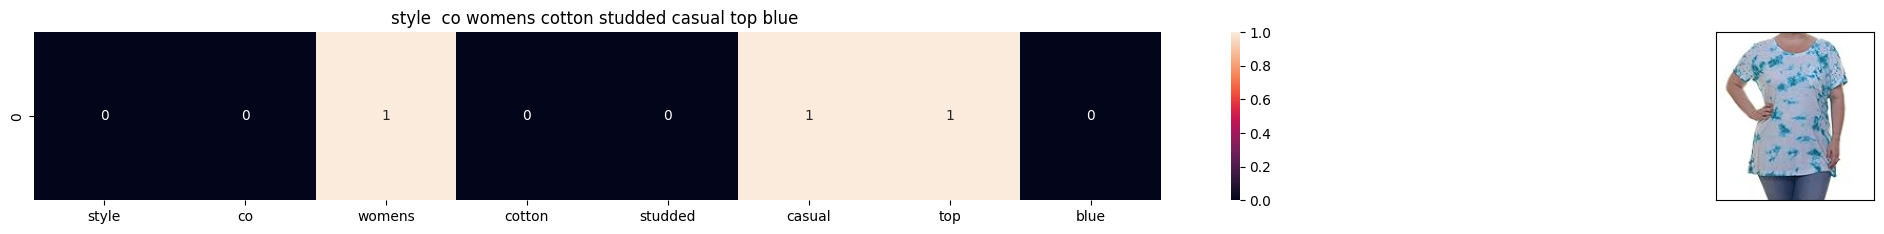

ASIN : B01H61EW3G
Brand: Styleco
Title: style  co womens cotton studded casual top blue 
Euclidean similarity with the query image : 0.6464466094067263


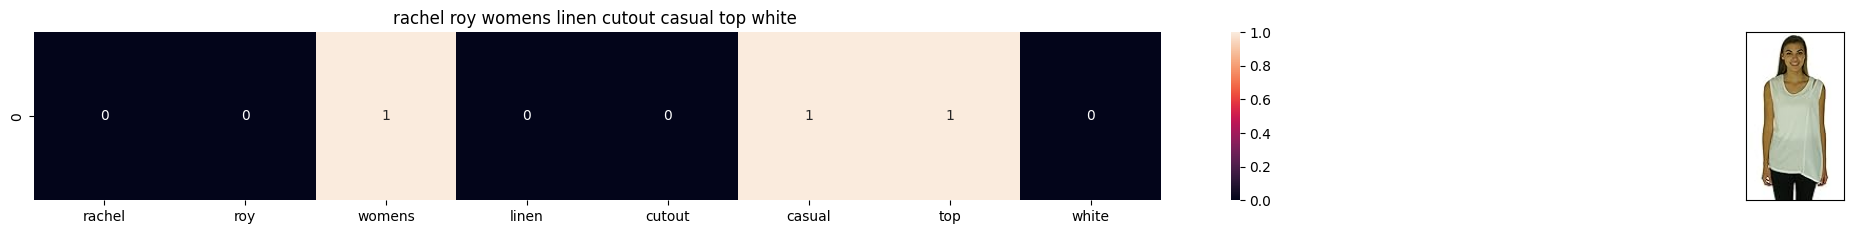

ASIN : B01BKSU8GG
Brand: Rachel Rachel Roy
Title: rachel roy womens linen cutout casual top white 
Euclidean similarity with the query image : 0.6464466094067263


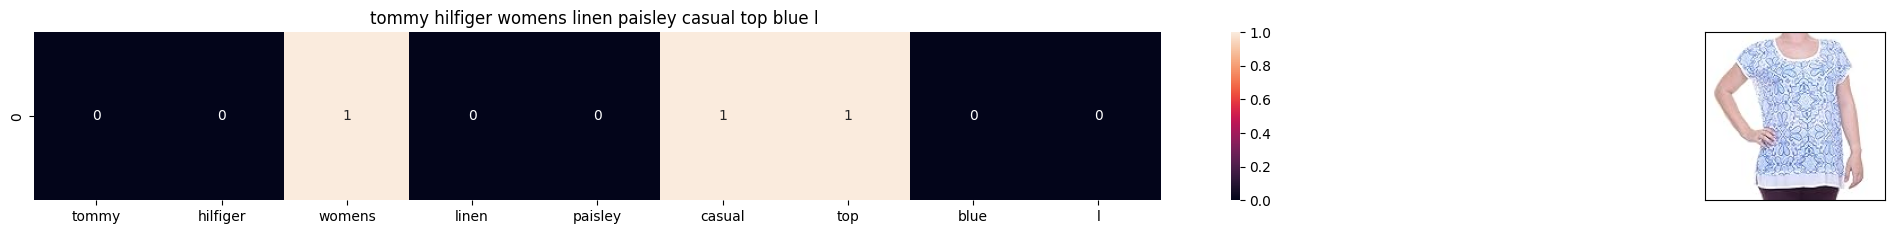

ASIN : B06WLHTS8S
Brand: Tommy Hilfiger
Title: tommy hilfiger womens linen paisley casual top blue l 
Euclidean similarity with the query image : 0.6464466094067263


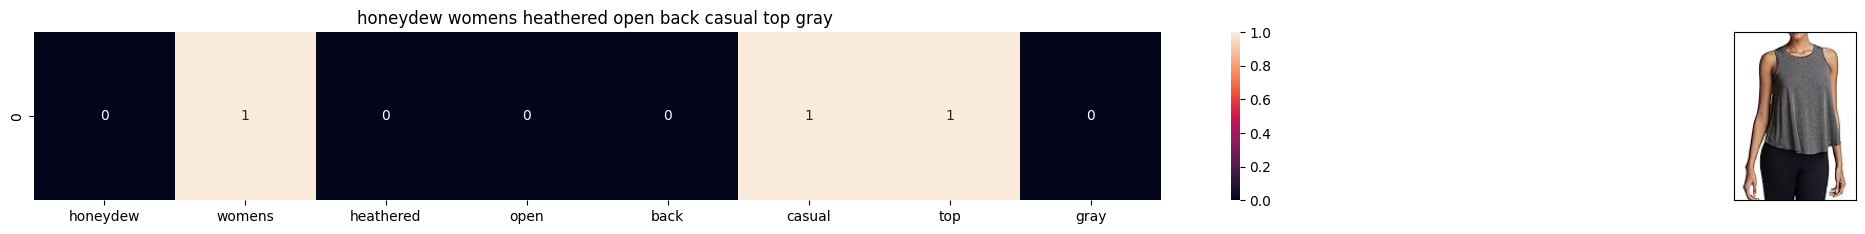

ASIN : B01M3Y4Q4Q
Brand: Honeydew
Title: honeydew womens heathered open back casual top gray 
Euclidean similarity with the query image : 0.6464466094067263


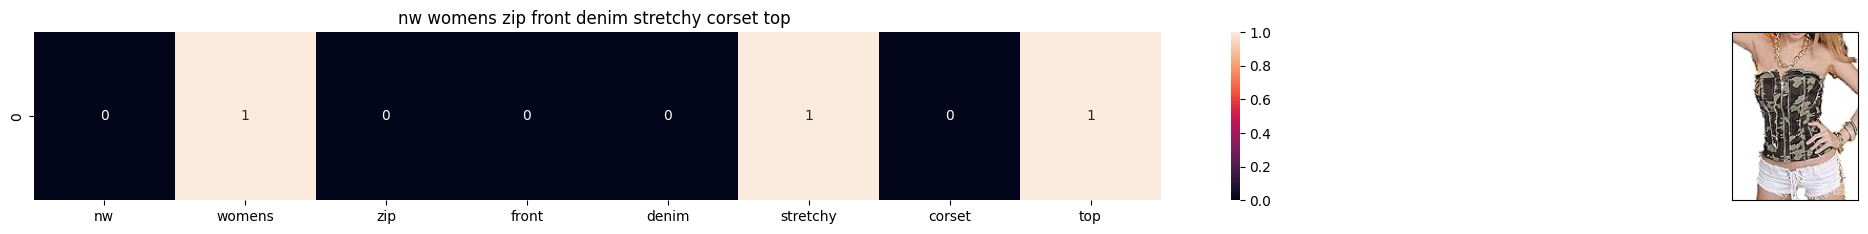

ASIN : B01G36517Q
Brand: 60°N 95°W
Title: nw womens zip front denim stretchy corset top 
Euclidean similarity with the query image : 0.6464466094067263


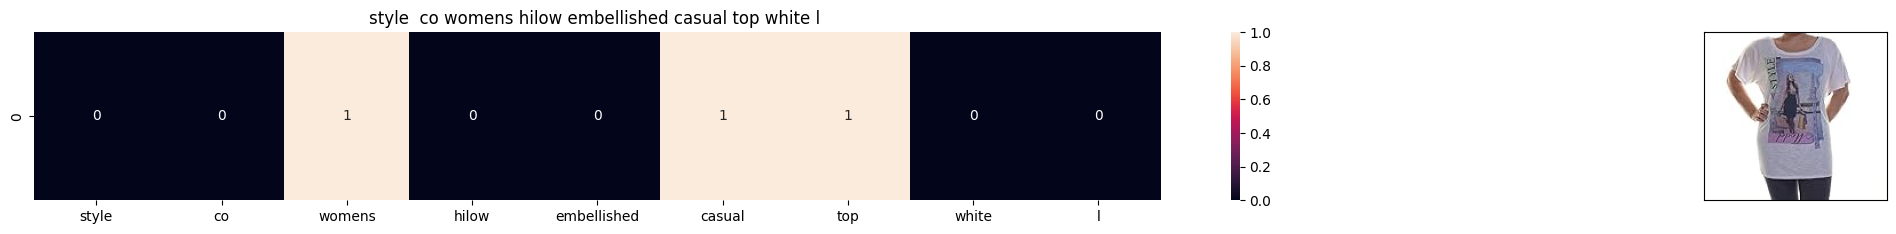

ASIN : B01AK5U0R2
Brand: Style & Co.
Title: style  co womens hilow embellished casual top white l 
Euclidean similarity with the query image : 0.6464466094067263


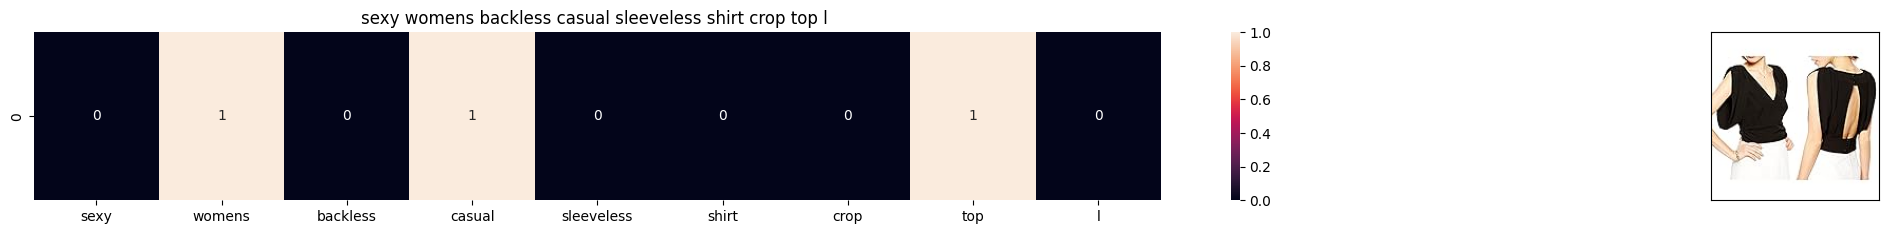

ASIN : B00PBXP3QW
Brand: Wotefusi
Title: sexy womens backless casual sleeveless shirt crop top l 
Euclidean similarity with the query image : 0.6464466094067263


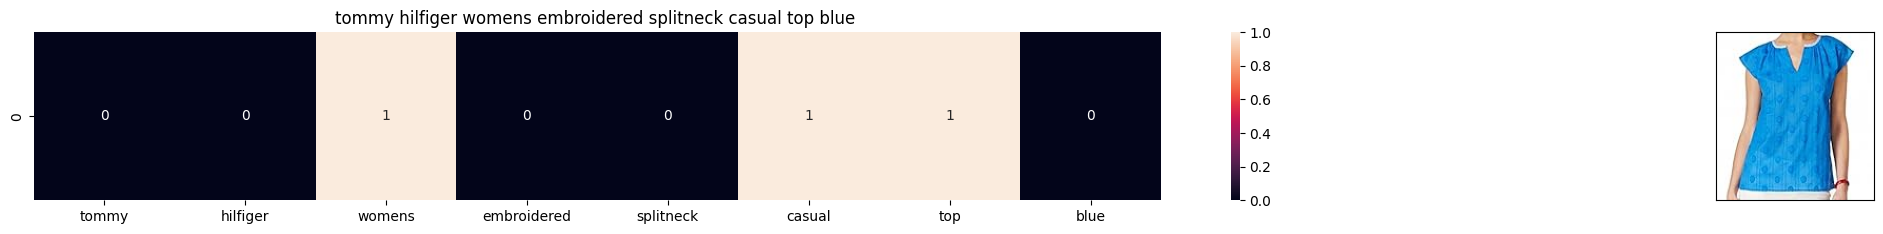

ASIN : B071VSDC1R
Brand: Tommy Hilfiger
Title: tommy hilfiger womens embroidered splitneck casual top blue 
Euclidean similarity with the query image : 0.6464466094067263


In [156]:
bag_of_words_model(doc_id=931, num_results=20)


This execution shows us the 20 most similar products related to the apparel at Id = 931 (BOW model). This is similar to query in retrieval systems. For example, when you type a query to search for some product on Amazon, the search engine will map your query against a set of keys (featues and feature matrix) associated with candidate products in the database, then present you the best matched videos (values/pdsit in this notebook).

In [157]:
data.isnull().sum()

,0
asin,0
brand,50
color,0
medium_image_url,0
product_type_name,0
title,0
formatted_price,0


In [158]:
data['title']

,title
4,featherlite ladies long sleeve stain resistant...
6,womens unique 100 cotton special olympics wor...
15,featherlite ladies moisture free mesh sport sh...
27,supernatural chibis sam dean castiel neck tshi...
43,featherlite ladies silky smooth pique white xl
...,...
183081,yuelian womens chiffon short sleeves sun prote...
183092,vintage america womens large lace collared blo...
183096,tart womens collections ann wrap top xs black
183101,soprano womens small tiefringe slubknit tank t...


#TF-IDF based Product Similarity

In [159]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0.0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
tfidf_title_features.shape

(17593, 12927)

In [160]:
def tfidf_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(tfidf_title_features, tfidf_title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i], data['title'].loc[df_indices[0]],
                   data['title'].loc[df_indices[i]],
                   data['medium_image_url'].loc[df_indices[i]], 'tfidf')

        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)

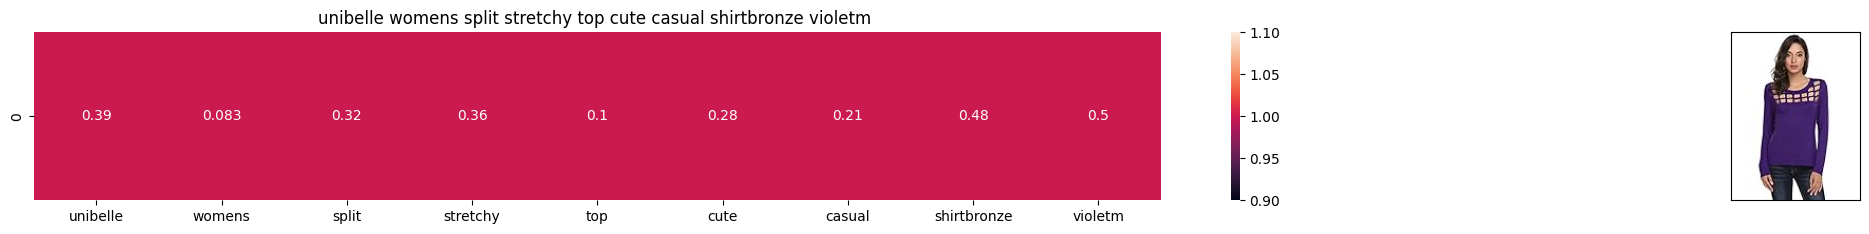

ASIN : B074PT5M59
BRAND : Beautyuu
Eucliden distance from the given image : 0.0


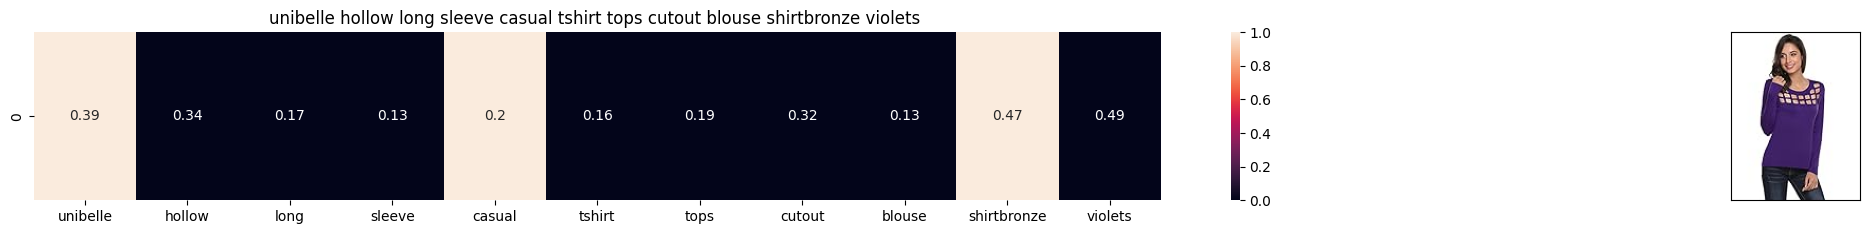

ASIN : B074PT8JSB
BRAND : Beautyuu
Eucliden distance from the given image : 1.074219544239548


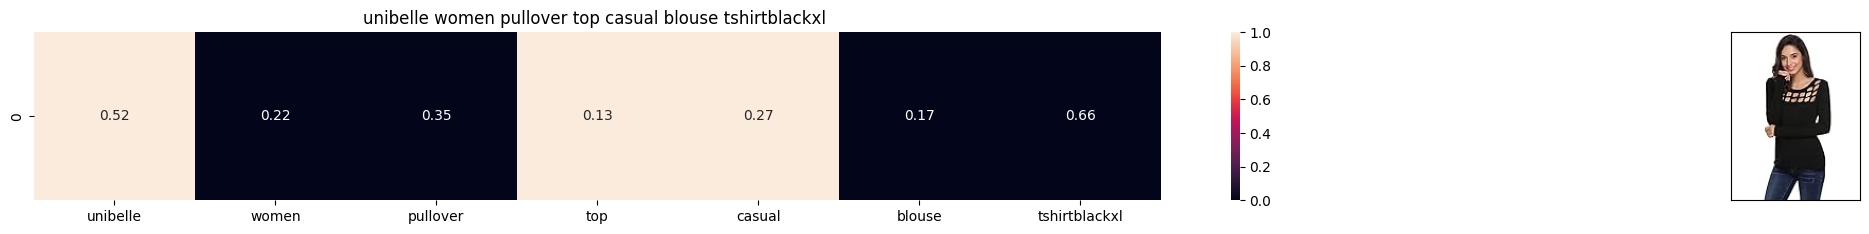

ASIN : B074PSVK8N
BRAND : Beautyuu
Eucliden distance from the given image : 1.2041272330143271


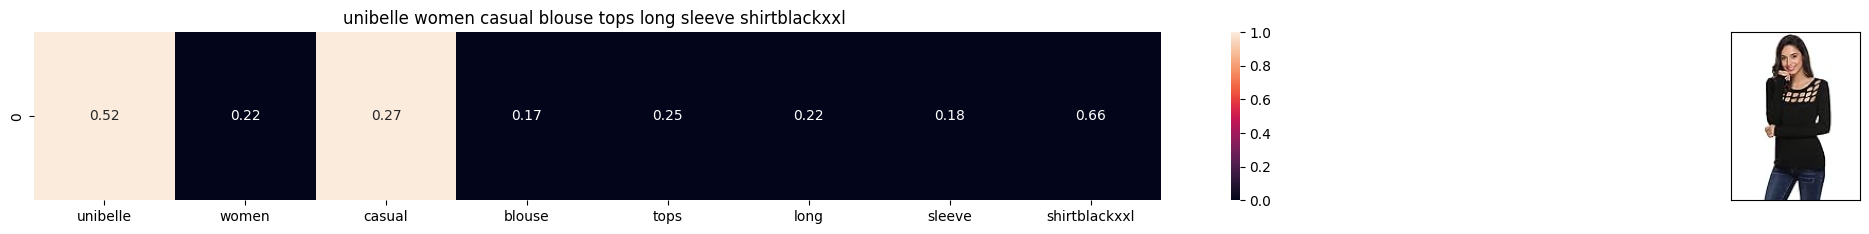

ASIN : B074PTKTFT
BRAND : Beautyuu
Eucliden distance from the given image : 1.215047091633748


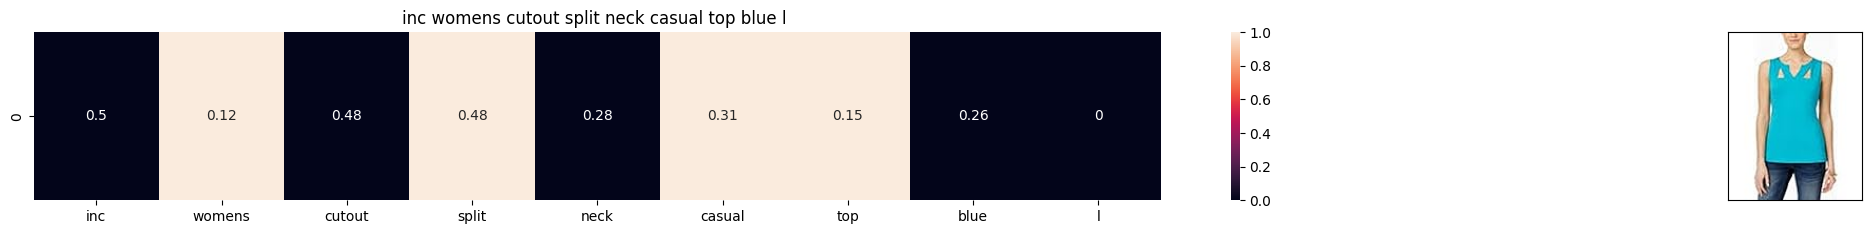

ASIN : B01NAST7MR
BRAND : INC International Concepts
Eucliden distance from the given image : 1.2311386033981166


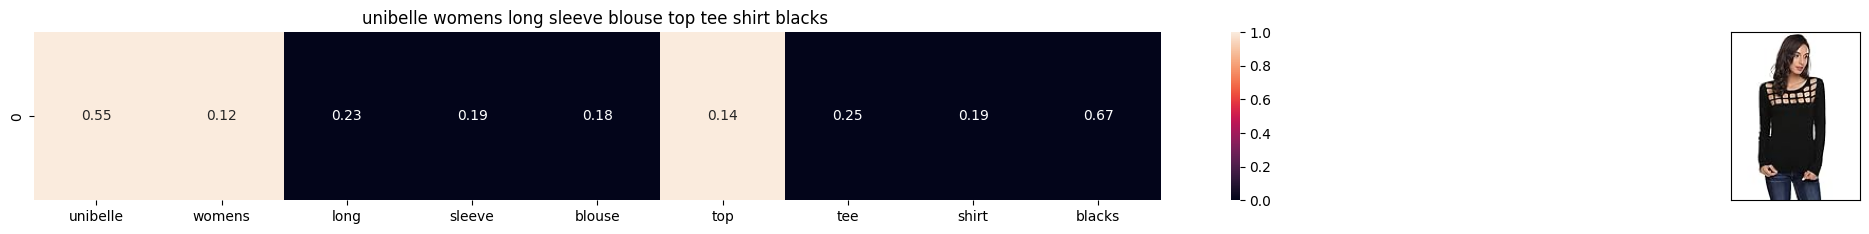

ASIN : B074PSQW3B
BRAND : Beautyuu
Eucliden distance from the given image : 1.232179212362592


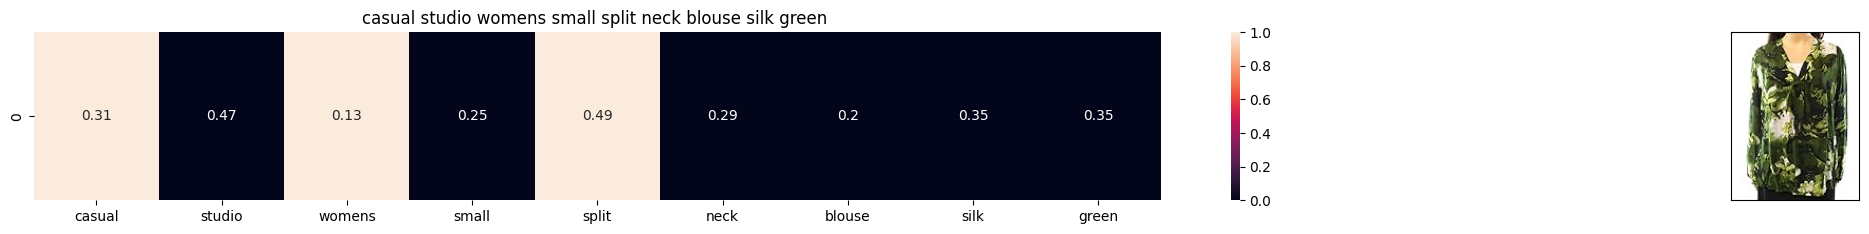

ASIN : B0725YGW26
BRAND : Casual Studio
Eucliden distance from the given image : 1.2410509621039807


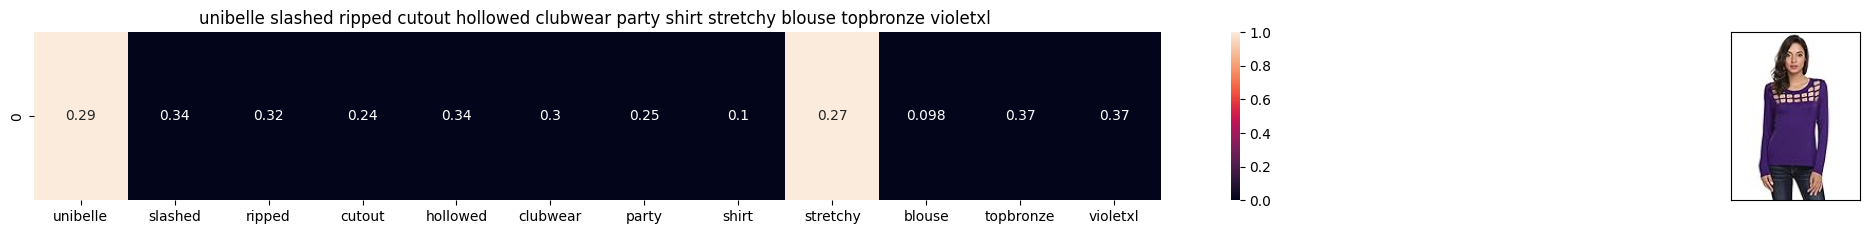

ASIN : B074PT7TS3
BRAND : Beautyuu
Eucliden distance from the given image : 1.2541508050869106


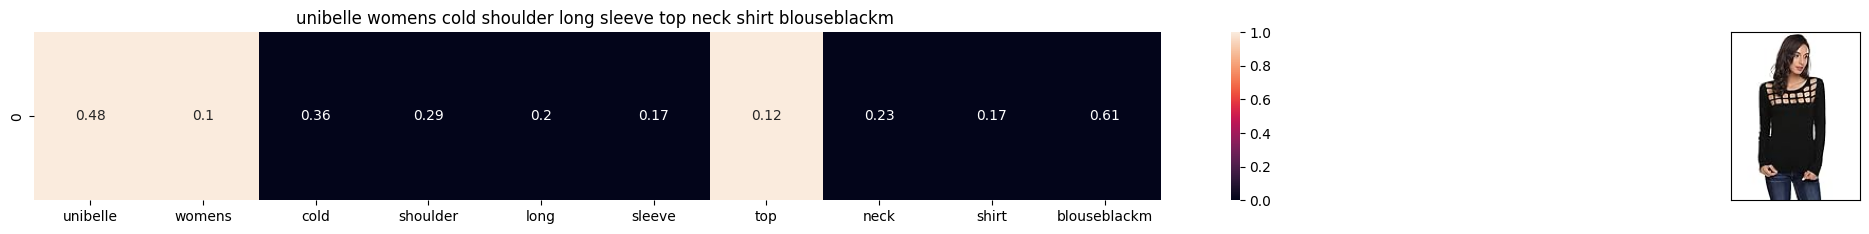

ASIN : B074PSMG35
BRAND : Beautyuu
Eucliden distance from the given image : 1.2555439089201972


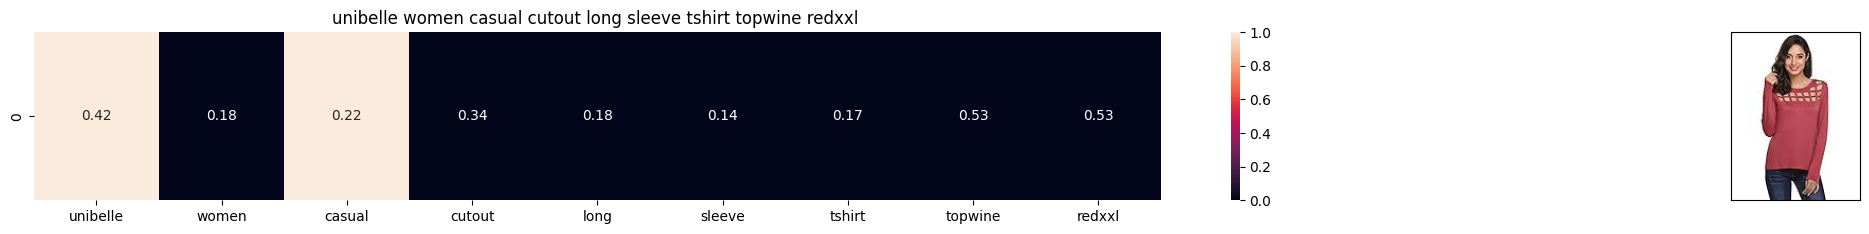

ASIN : B074PT8XGT
BRAND : Beautyuu
Eucliden distance from the given image : 1.2574602783900846


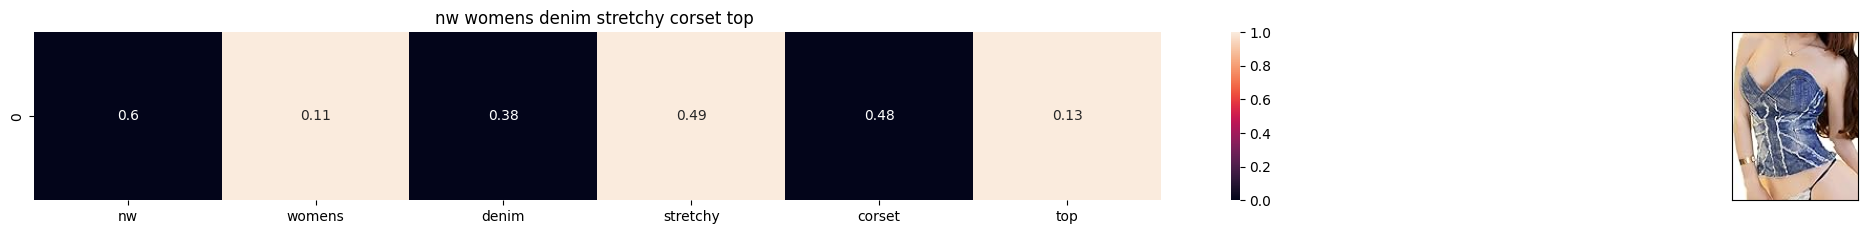

ASIN : B01G364ZHS
BRAND : 60°N 95°W
Eucliden distance from the given image : 1.2653964374168882


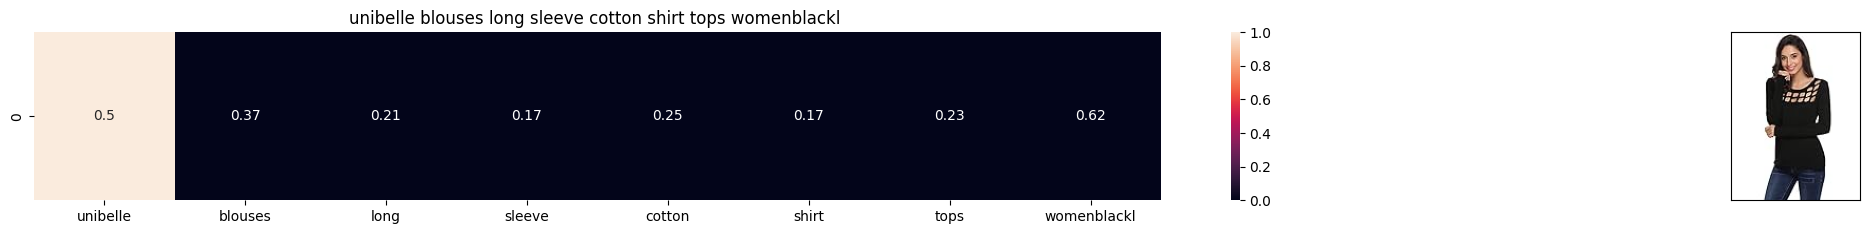

ASIN : B074PSYX8J
BRAND : Beautyuu
Eucliden distance from the given image : 1.268201536342607


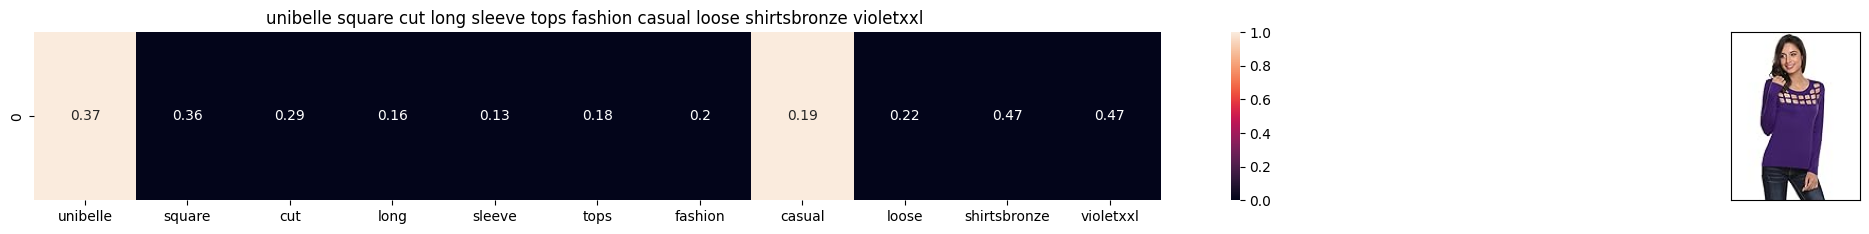

ASIN : B074PTS44R
BRAND : Beautyuu
Eucliden distance from the given image : 1.2745028206164088


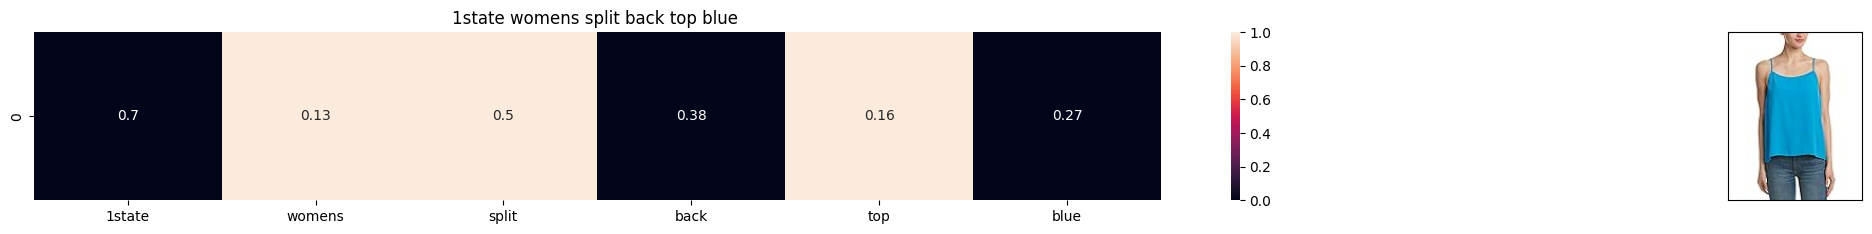

ASIN : B071DQ3VQH
BRAND : 1.State
Eucliden distance from the given image : 1.2756712210661723


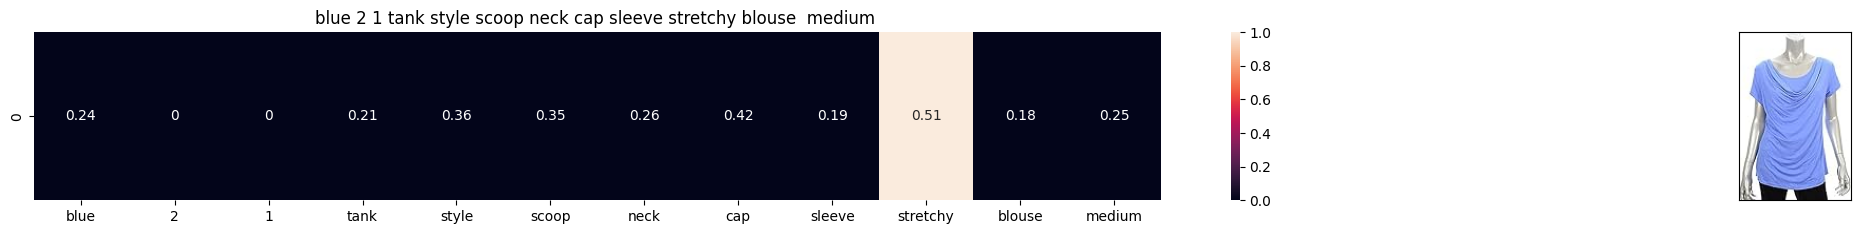

ASIN : B06Y1B4Z8L
BRAND : Style&Co
Eucliden distance from the given image : 1.2772632388361824


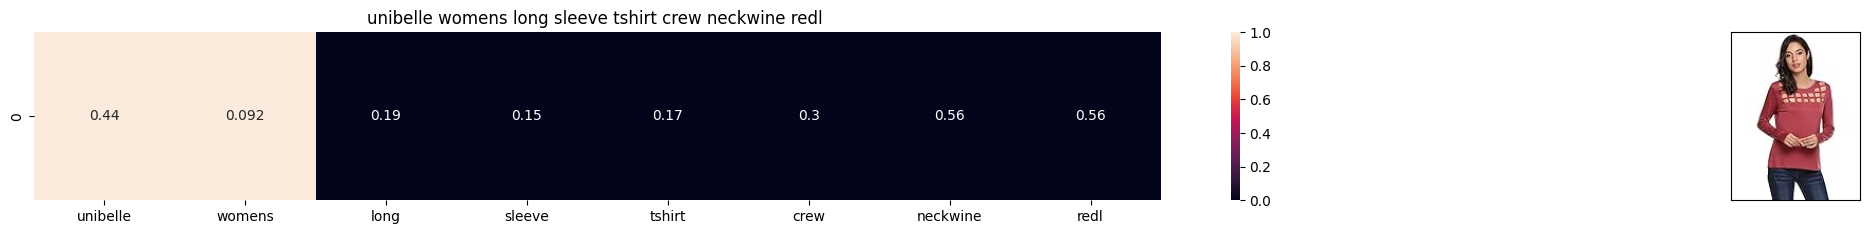

ASIN : B074PTFP2N
BRAND : Beautyuu
Eucliden distance from the given image : 1.279279693122636


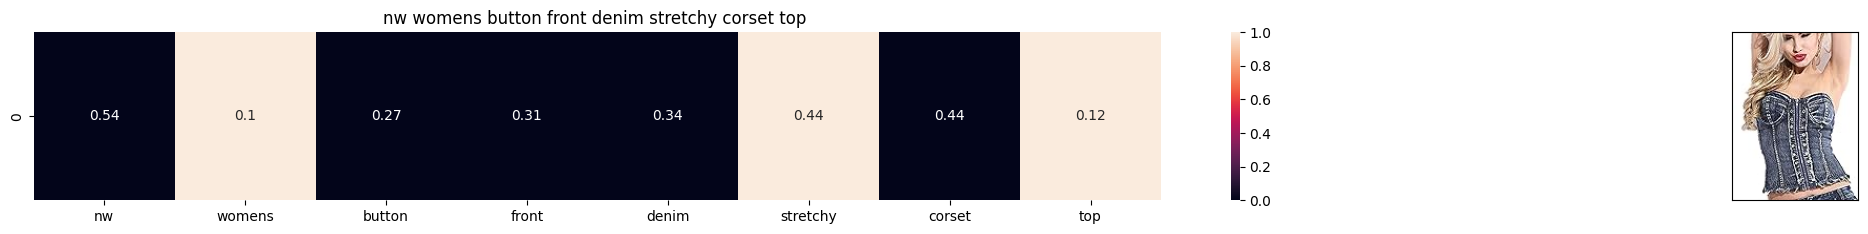

ASIN : B01G36529S
BRAND : 60°N 95°W
Eucliden distance from the given image : 1.2794843945011103


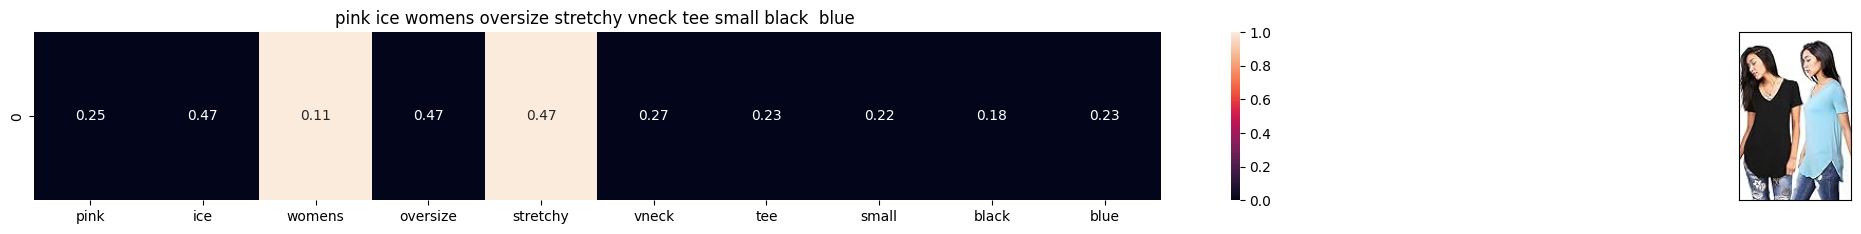

ASIN : B01F2PH3QQ
BRAND : Emmas Closet
Eucliden distance from the given image : 1.2799099083932959


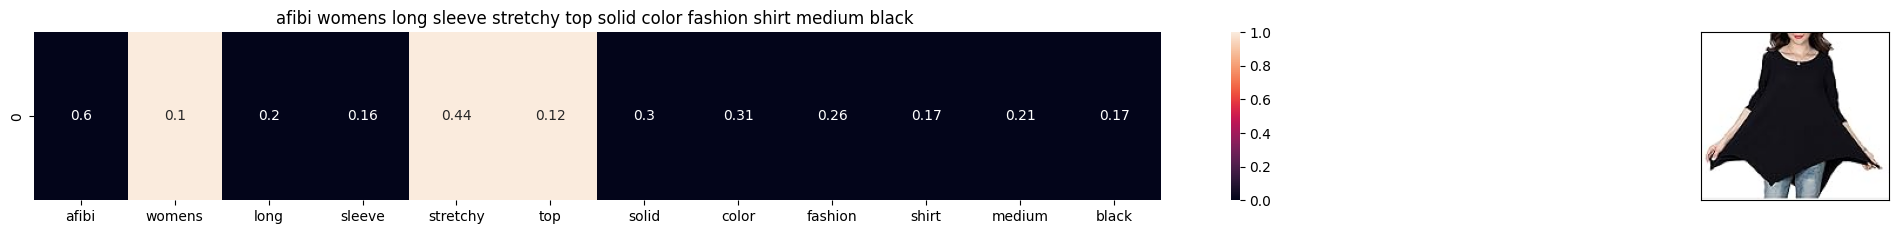

ASIN : B01LYW61QG
BRAND : Afibi
Eucliden distance from the given image : 1.2814632714996623


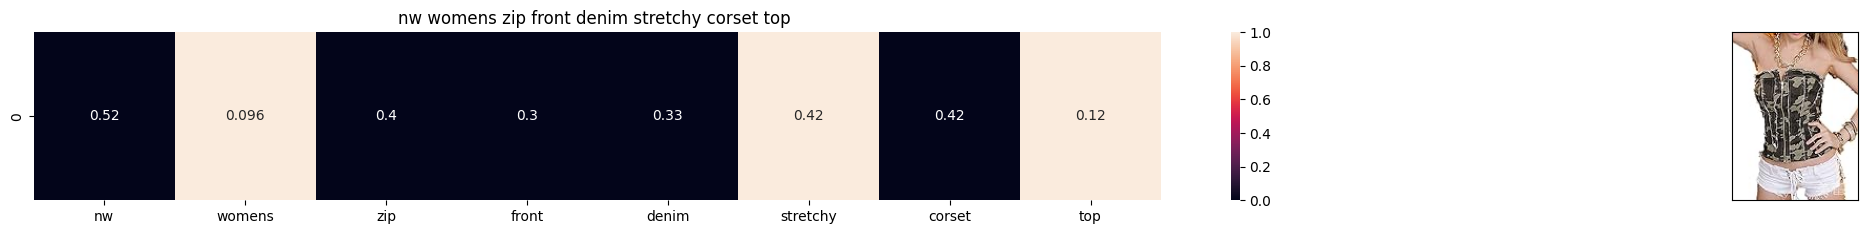

ASIN : B01G36517Q
BRAND : 60°N 95°W
Eucliden distance from the given image : 1.286294413946335


In [162]:
tfidf_model(931, 20)

# Summary

As you can see the system is quite accurately giving us the product recommendation.

The BOW model is giving us quite a good variety of products and also displaying different types of brands.
In tfidf model, the products are quite restricted to being similar and of the same brand but BOW is giving us a better variety since it is changing the brands.

